In [2]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [9]:
! sed 's/50L/50/' ./data/igh_from_master.csv>./data/igh_from_master.csv2
! sed 's/75L/75/' ./data/igh_from_master.csv2>./data/igh_from_master.csv3
! sed 's/100L/100/' ./data/igh_from_master.csv3>./data/igh_from_master.csv4

In [10]:
data = pd.read_csv('./data/igh_from_master.csv4')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data = data[(data['Kmer Size'] ==24)]
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
147,325,bfc_rep.seq_sim_rl_50_cov_1_1_24.corrected.fas...,run.bfc.sh,24,95,244,246,1,55,0,...,1,50,0.363333,0.694268,0.203333,0.984899,IGH,0.000000,NaN,314
148,326,bfc_rep.seq_sim_rl_50_cov_2_1_24.corrected.fas...,run.bfc.sh,24,0,5,3,0,0,0,...,2,50,0.000000,NaN,0.000000,0.990000,IGH,0.000000,NaN,0
149,327,bless_rep.seq_sim_rl_50_cov_1_1_24.corrected.f...,run.bless.sh,24,336,215,16,0,5,0,...,1,50,0.925134,0.984820,0.910873,0.992514,IGH,0.006154,0.073864,527
152,330,bfc_rep.seq_sim_rl_50_cov_8_1_24.corrected.fas...,run.bfc.sh,24,0,341,571,0,3,0,...,8,50,0.044199,0.869565,0.037569,0.980962,IGH,0.000000,NaN,46
154,332,bless_rep.seq_sim_rl_50_cov_8_1_24.corrected.f...,run.bless.sh,24,1067,746,175,0,17,0,...,8,50,0.866171,0.962810,0.832714,0.982903,IGH,0.015062,0.076821,1694


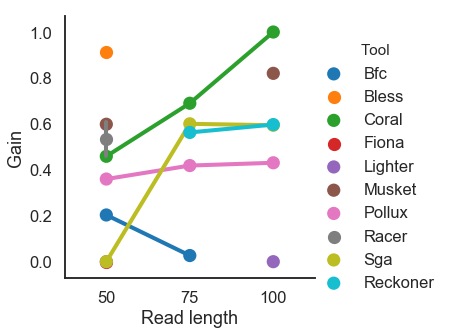

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Length", y="Base Gain", kind="point",data = data[(data['Coverage'] ==1)]
, hue='Tool')
g.set(xlabel='Read length', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("gain_cov1_IGH.png", bbox_inches='tight')

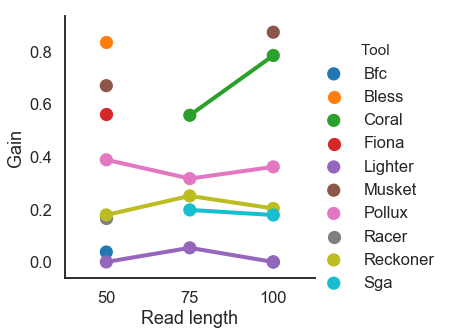

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Length", y="Base Gain", kind="point",data = data[(data['Coverage'] ==8)]
, hue='Tool')
g.set(xlabel='Read length', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("gain_cov8_IGH.png", bbox_inches='tight')

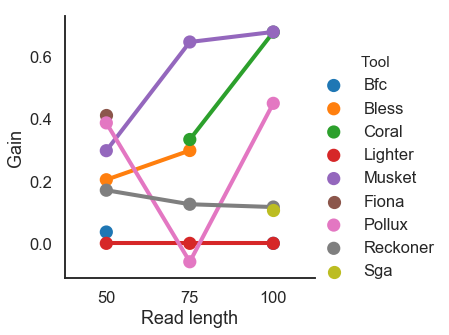

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Length", y="Base Gain", kind="point",data = data[(data['Coverage'] ==32)]
, hue='Tool')
g.set(xlabel='Read length', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("gain_cov32_IGH.png", bbox_inches='tight')